In [2]:
# Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
# Load Dataset
df_pumpkin = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')

In [4]:
df_pumpkin

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [5]:
# Encoder
label_encoder = LabelEncoder()
df_pumpkin['Class_encoded'] = label_encoder.fit_transform(df_pumpkin['Class'])

In [6]:
# Fitur dan Target
X = df_pumpkin[["Area","Perimeter","Major_Axis_Length","Minor_Axis_Length","Convex_Area","Equiv_Diameter","Eccentricity","Solidity","Extent","Roundness","Aspect_Ration","Compactness"]].values  
y = df_pumpkin['Class_encoded'].values

In [7]:
#Split Dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
# Train Model with Perceptron
classifier = Perceptron(random_state=0, max_iter=10, tol=1e-3)
classifier.fit(x_train, y_train)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(max_iter=10)

In [10]:
# Predict Input dari User
input_features = [[88.999,1.111,444.44,234.56,89.981,338.85,0.66,0.99,0.74,0.79,1.97,0.71]]
input_scaled = scaler.transform(input_features)
prediction = classifier.predict(input_scaled)

In [11]:
# Hasil Prediksi
predicted_species = label_encoder.inverse_transform(prediction)
print(f"Class yang diprediksi: {predicted_species[0]}")

Class yang diprediksi: Çerçevelik


In [12]:
# Evaluasi Model
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


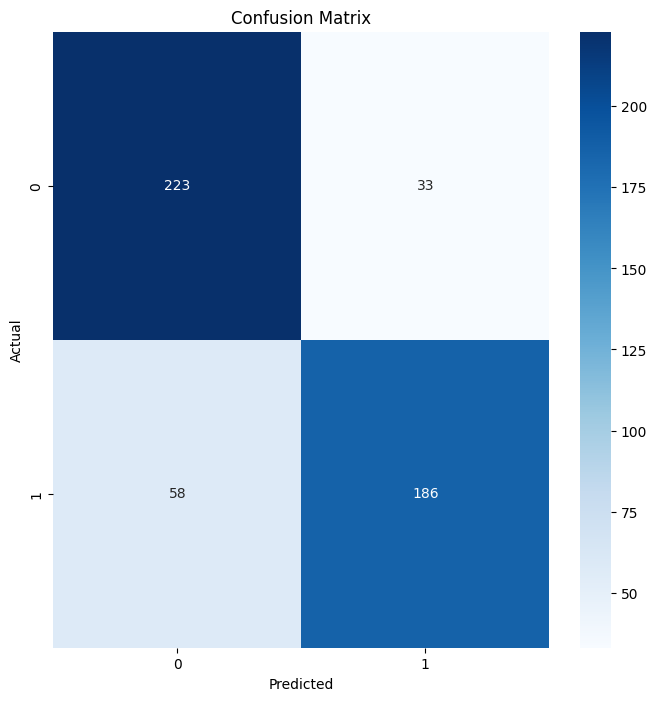

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
import joblib

# Simpan model
joblib.dump(classifier, 'perceptron_model.pkl')
# Simpan scaler
joblib.dump(scaler, 'scaler.pkl')
# Simpan Label Encoder
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']